In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [11]:
data["annual_income"] = data["annual_income"].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [13]:
data = data.fillna("NA")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [25]:
data['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

<Axes: >

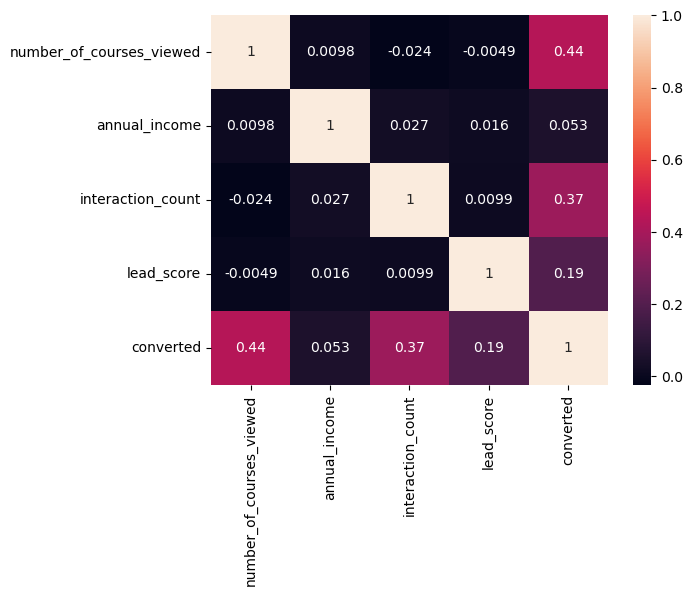

In [53]:
corr = data[['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']].corr()
sns.heatmap(corr, annot=True)

In [59]:
np.random.seed(42)

In [103]:
data = pd.get_dummies(data, columns=['lead_source', 'industry', 'employment_status', 'location'])

In [145]:
X = data.drop(['converted'], axis=1)
y = data['converted']

In [147]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40)

lenx = len(X_)
leny = len(y_)
X_test = X_[:round(lenx/2)]
X_val = X_[round(lenx/2):]
y_test = y_[:round(leny/2)]
y_val = y_[round(leny/2):]

In [101]:
for column in X_test.columns:

    print(f"{column}:{mutual_info_score(y_test, X_test[column])}")

lead_source:0.026598981827139656
industry:0.014638131858242906
number_of_courses_viewed:0.0857827169016567
annual_income:0.5741063548381641
employment_status:0.010619170213906487
location:0.0034869125695327144
interaction_count:0.10005998082363429
lead_score:0.25240198077045056


C:\Users\leona\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [149]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [151]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [155]:
round(model.score(X_val, y_val), 2)

0.72

In [173]:
colunas_a_remover = X_train.filter(regex='^industry_').columns.tolist()
X_train_ind = X_train.drop(columns=colunas_a_remover) 
X_val_ind = X_val.drop(columns=colunas_a_remover) 

In [187]:
model.fit(X_train_ind, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [189]:
model.score(X_val_ind, y_val)

0.7098976109215017

In [181]:
colunas_a_remover = X_train.filter(regex='^employment_status_').columns.tolist()
X_train_emp = X_train.drop(columns=colunas_a_remover) 
X_val_emp = X_val.drop(columns=colunas_a_remover) 

In [185]:
model.fit(X_train_emp, y_train)
model.score(X_val_emp, y_val)

0.7235494880546075

In [193]:
X_train_lead = X_train.drop(columns='lead_score') 
X_val_lead = X_val.drop(columns='lead_score') 

In [195]:
model.fit(X_train_lead, y_train)
model.score(X_val_lead, y_val)

0.7201365187713311

In [197]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

In [199]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

In [207]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [209]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')